# Постановка задачи кластеризации

Пусть $X$ — множество объектов, $Y$ — множество номеров (имён, меток) кластеров. 
- Задана функция расстояния между объектами $ \rho(x,x')$. 
- Имеется конечная обучающая выборка объектов $X^m = \{ x_1, \dots, x_m \} \subset X$. 
- Требуется разбить выборку на непересекающиеся подмножества, называемые кластерами, так, чтобы каждый кластер состоял из объектов, близких по метрике $\rho$, а объекты разных кластеров существенно отличались. При этом каждому объекту $x_i\in X^m$ приписывается номер кластера $y_i$.

Алгоритм кластеризации — это функция $a:\, X\to Y$, которая любому объекту $x\in X$ ставит в соответствие номер кластера $y\in Y$. Множество $Y$ в некоторых случаях известно заранее, однако чаще ставится задача определить оптимальное число кластеров, с точки зрения того или иного критерия качества кластеризации.


Кластеризация (обучение без учителя) отличается от классификации (обучения с учителем) тем, что метки исходных объектов $y_i$ изначально не заданы, и даже может быть неизвестно само множество $Y$.

Выше постановка чёткой кластеризации (одному объекту сопоставляется один кластер). Выделяют ещё нечеткую кластеризацию, когда одному объекту сопоставляется несколько кластеров, с некоторыми весами. С ней вы встретитесь при работе над тематическим моделированием.

## Ничего идеального нет

Введем несколько определений.

*Определение 1:*
> Алгоритм кластеризации $a$ является **масштабно-инвариантным** (англ. scale-invariant), если для любой функции расстояния $\rho$ и любой константы $\alpha>0$ результаты кластеризации с использованием расстояний $ρ$ и $α⋅ρ$ совпадают.

*Определение 2:*
> **Полнота** (англ. Richness). Множество результатов кластеризации алгоритма $a$ в зависимости от изменения функции расстояния $ρ$ должно совпадать со множеством всех возможных разбиений множества объектов $X$.

*Определение 3:*
> Функция расстояния $ρ′$ является **допустимым преобразованием** функции расстояния $ρ$, если
  1. $\rho′(x_i,x_j)\leq\rho(x_i,x_j)$, если $x_i$ и $x_j$ лежат в одном кластере; (сужает)
  2. $\rho′(x_i,x_j)\geq \rho(x_i,x_j)$, если $x_i$ и $x_j$ лежат в разных кластерах. (растягивает)

*Определение 4:*
> Алгоритм кластеризации является **согласованным** (англ. consistent), если результат кластеризации не изменяется после допустимого преобразования функции расстояния.

---
**Теорема Клейнберга о невозможности:**
> Для множества объектов, состоящего из двух и более элементов, не существует алгоритма кластеризации, который был бы одновременно *масштабно-инвариантным*, *согласованным* и *полным*.



Доказательство: https://www.cs.cornell.edu/home/kleinber/nips15.pdf

Решение задачи кластеризации принципиально неоднозначно, и тому есть несколько причин:

- Не существует однозначно **наилучшего критерия качества** кластеризации. Известен целый ряд эвристических критериев, а также ряд алгоритмов, не имеющих чётко выраженного критерия, но осуществляющих достаточно разумную кластеризацию «по построению». Все они могут давать разные результаты.
- **Число кластеров**, как правило, неизвестно заранее и устанавливается в соответствии с некоторым субъективным критерием.
- Результат кластеризации существенно зависит от **метрики**, выбор которой, как правило, также субъективен и определяется экспертом.

# Генерация датасета

Два варианта:
- sklearn.datasets.make_blobs -- сгенерировать просто точки (сужает количество вариантов используемых метрик качества, но близко к реальной постановке).<details>
<summary>на самом деле нет</summary>
make_blobs тоже генерирует информацию о принадлежности к кластеру, поищите (thx to GUN1A)
</details>
- sklearn.datasets.make_classification -- сгенерировать точки и метки для них (метки при обучении не используются, только при оценке качества).



In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


data, data_y = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=110)

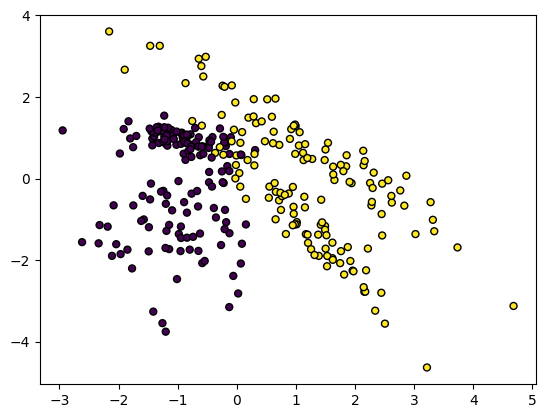

In [ ]:
# как видит классификатор
plt.scatter(data[:, 0], data[:, 1], marker="o", c=data_y, s=25, edgecolor="k")
plt.show()

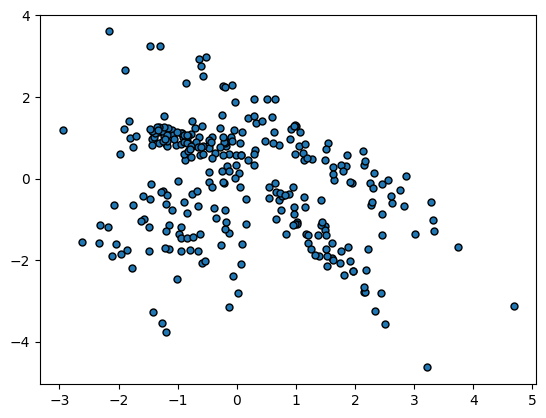

In [ ]:
# как видит кластеризатор
plt.scatter(data[:, 0], data[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

# Алгоритмы кластеризации

## K-means

[Описание метода](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85)

![](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)

Шаги алгоритма:
```
1. Выбрать случайно координаты центроидов для каждого кластера.
2. Посчитать расстояния от каждого объекта до центроидов.
3. Посчитать центр масс (центроид) каждого кластера.
4. Проверить условие остановки, вернуться к шагу 2.
```

От начального выбора центроидов зависит качество и скорость сходимости. Существуют модификации, которые улучшают случайный выбор ([K-means++](https://ru.wikipedia.org/wiki/K-means%2B%2B), например)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, n_init='auto').fit(data)

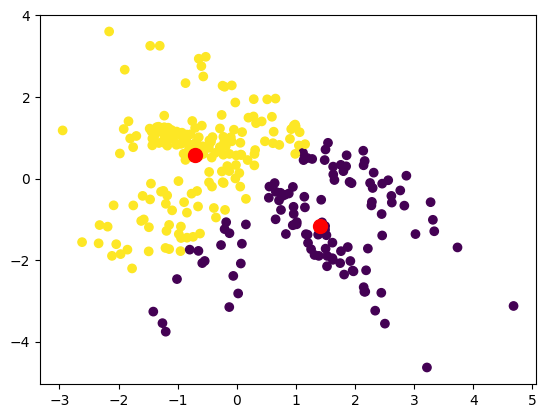

In [ ]:
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

# Оценка качества кластеризации

Меры оценки кластеризации бывают двух видов:
- Внутренние -- меры отображают качество кластеризации только по информации в данных
- Внешние -- меры основаны на сравнении результата кластеризации с априори известным разделением на классы

[Большой список мер оценки](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8)

[Поменьше, но с картинками](https://habr.com/ru/companies/yandex/articles/500742/)

Самые частые:
- Внутренние: силуэт
- Внешние: rand score

In [ ]:
from sklearn.metrics.cluster import rand_score

rand_score(kmeans.labels_, data_y)

0.6305239687848383

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(data, kmeans.labels_)

0.43210036054559814

# Подбор оптимального количества кластеров

Количество кластеров -- обычный гиперпараметр.
Т.о. для подбора оптимального гиперпараметра нужно определиться с оценкой качества алгоритма и списком значений для гиперпараметра. 

## Метод локтя
Существует метод локтя, который использует такую оценку как [ компактность](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8#.D0.9A.D0.BE.D0.BC.D0.BF.D0.B0.D0.BA.D1.82.D0.BD.D0.BE.D1.81.D1.82.D1.8C_.D0.BA.D0.BB.D0.B0.D1.81.D1.82.D0.B5.D1.80.D0.BE.D0.B2_.28.D0.B0.D0.BD.D0.B3.D0.BB._Cluster_Cohesion.29) (kmeans.inertia_).



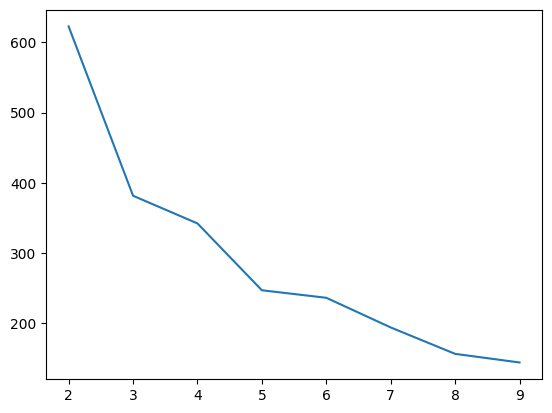

In [ ]:
inertias = []

for i in range(2, 10):
  m = KMeans(i, n_init='auto').fit(data)
  inertias.append(m.inertia_)

plt.plot(range(2,10), inertias)

## Метод силуэта

Использует понятно какую [метрику](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8#.D0.A1.D0.B8.D0.BB.D1.83.D1.8D.D1.82_.28.D0.B0.D0.BD.D0.B3.D0.BB._Silhouette.29)

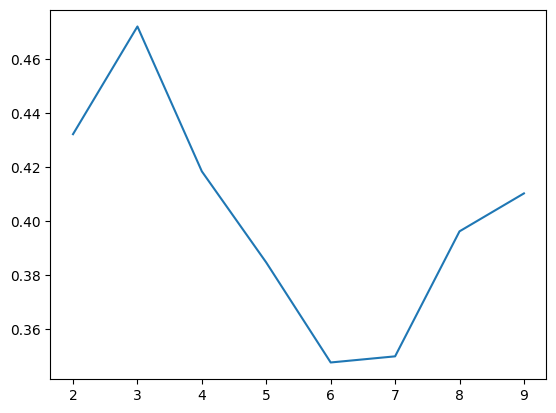

In [ ]:
from sklearn.metrics import silhouette_score

ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data, KMeans(i, n_init='auto').fit(data).labels_))

plt.plot(range(2,10), ss)

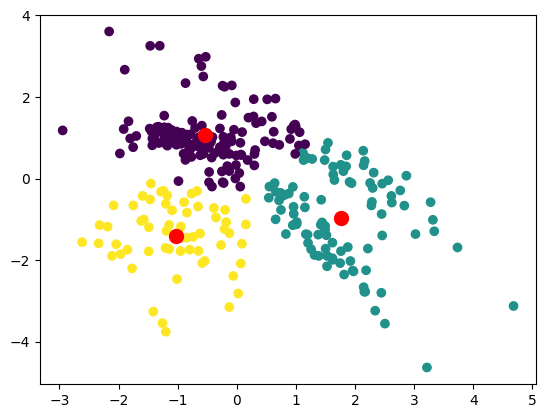

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(3, n_init='auto').fit(data)

plt.scatter(data[:,0], data[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

# Алгоритмы кластеризации

## Affinity propagation

[Хорошее объяснение](https://habr.com/ru/articles/321216/)

Affinity Propagation (AP) - это алгоритм кластеризации, основанный на передаче сообщений между точками данных. В отличие от других алгоритмов кластеризации, таких как K-means, AP не требует заранее определенного числа кластеров. Для этой цели двумя важными параметрами являются "preference", которые контролируют количество экземпляров и "damping factor", который снижает ответственность и доступность сообщений, чтобы избежать числовых колебаний при обновлении этих сообщений. Подбираются через поиск по сетке.

---

Шаги работы алгоритма Affinity Propagation:
1. Инициализация: Создайте матрицу сходства S, где каждый элемент s(i, j) представляет сходство между точками данных i и j. Обычно сходство определяется как отрицательное квадратное евклидово расстояние. Затем инициализируйте две другие матрицы: матрицу ответственности R и матрицу доступности A, заполнив их нулями.

2. Обновление ответственности: Обновите матрицу ответственности R, используя текущие значения матрицы доступности A и матрицы сходства S. Ответственность r(i, k) отражает насколько подходящим является объект k в качестве экземпляра для объекта i.

3. Обновление доступности: Обновите матрицу доступности A, используя текущие значения матрицы ответственности R. Доступность a(i, k) отражает насколько подходящим является объект i для выбора объекта k в качестве экземпляра.

4. Сходимость: Повторяйте шаги 2 и 3 до тех пор, пока не будет достигнут критерий сходимости. Обычно это означает, что значения матриц R и A стабилизируются после определенного числа итераций.


Выделение кластеров: После сходимости определите кластеры, выбрав для каждого объекта i экземпляр k, который максимизирует сумму ответственности r(i, k) и доступности a(i, k).
В результате работы алгоритма Affinity Propagation получаем кластеры с автоматически определенным числом кластеров и экземплярами, представляющими каждый кластер.


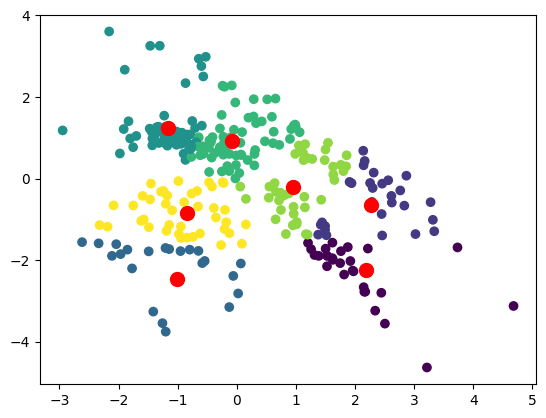

In [ ]:
from sklearn.cluster import AffinityPropagation

clustering = AffinityPropagation(preference=-42).fit(data)

plt.scatter(data[:,0], data[:,1], c=clustering.labels_)
plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s=100, c='red')

## DB-SCAN


- Находим точки в $\epsilon$  окрестности каждой точки и выделяем основные точки с более чем minPts соседями.

- Находим связные компоненты основных точек на графе соседей, игнорируя все неосновные точки.

- Назначаем каждую неосновную ближайшему кластеру, если кластер является $\epsilon$ -соседним, в противном случае считаем точку шумом.

[-1  0]


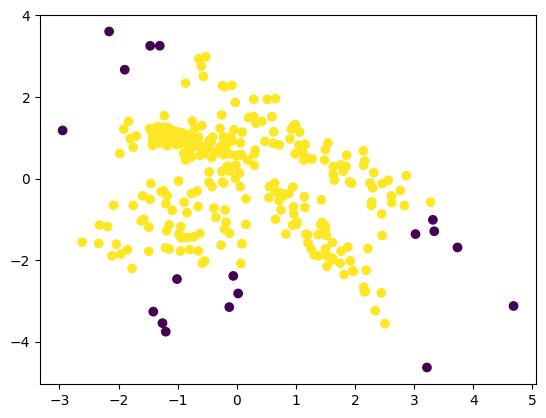

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

dbscan = DBSCAN().fit(data)

print(np.unique(dbscan.labels_))
plt.scatter(data[:,0], data[:,1], c=dbscan.labels_)

[-1  0  1  2  3  4  5]


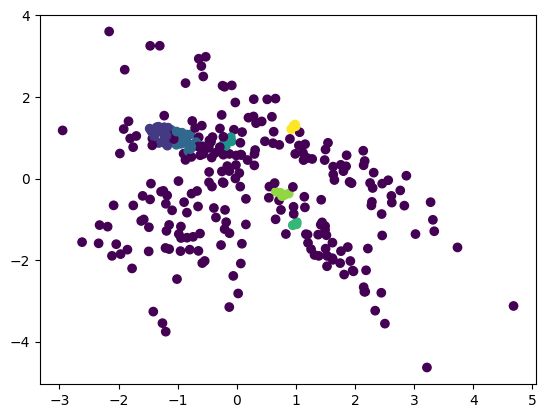

In [ ]:
dbscan = DBSCAN(eps=0.1, min_samples=4).fit(data)
print(np.unique(dbscan.labels_))
plt.scatter(data[:,0], data[:,1], c=dbscan.labels_)

In [ ]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=4).fit(data)
distances, indices = nbrs.kneighbors(data)
distances

array([[0.        , 0.14075262, 0.36792915, 0.44996652],
       [0.        , 0.03239929, 0.03600522, 0.07527797],
       [0.        , 0.11009673, 0.19382091, 0.21479119],
       ...,
       [0.        , 0.28260111, 0.32034932, 0.33287071],
       [0.        , 0.03065035, 0.05157891, 0.06290576],
       [0.        , 0.05460523, 0.06462845, 0.07566198]])

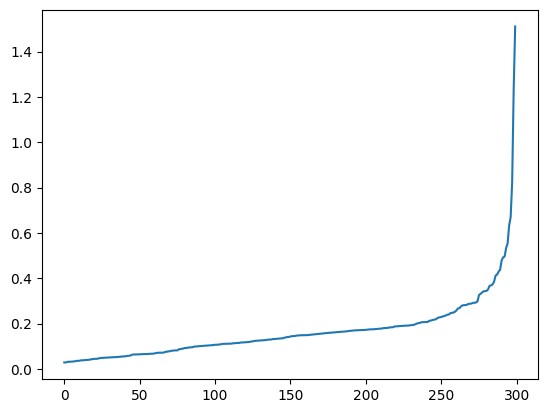

In [ ]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
# distances
plt.plot(distances)

[-1  0  1  2  3  4  5]


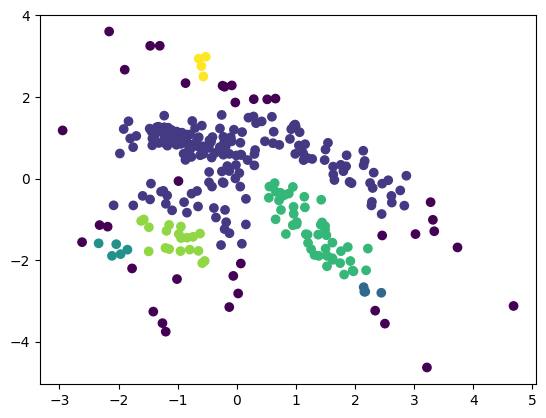

In [ ]:
dbscan = DBSCAN(eps=0.35, min_samples=4).fit(data)
print(np.unique(dbscan.labels_))
plt.scatter(data[:,0], data[:,1], c=dbscan.labels_)

# Gaussian Mixtures, EM

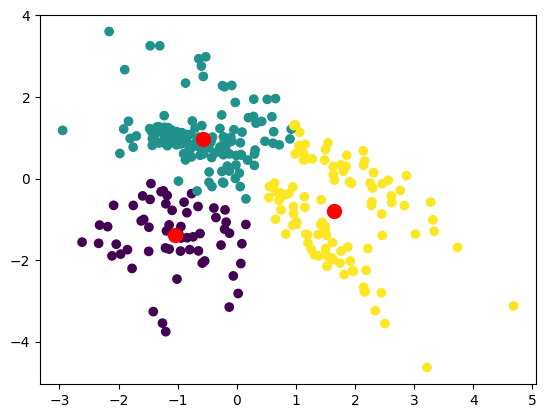

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3).fit(data)

gm.predict(data)

plt.scatter(data[:,0], data[:,1], c=gm.predict(data))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

## Иерархическая кластеризация

https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering


In [ ]:
from scipy.cluster import hierarchy

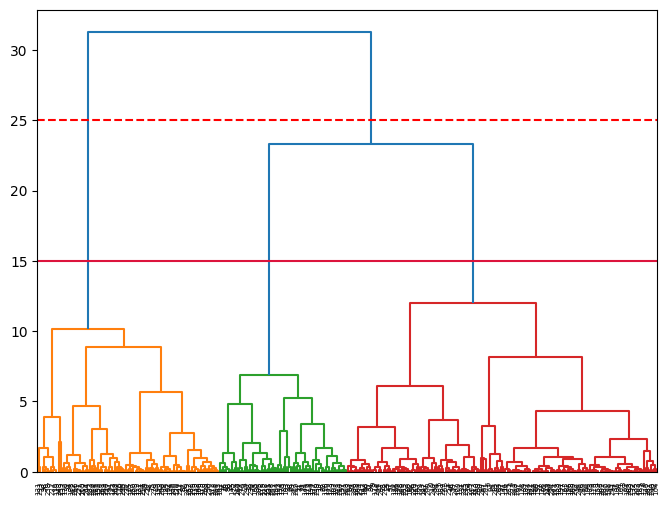

In [ ]:
clusters = hierarchy.linkage(data, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(25, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(15, color='crimson'); 

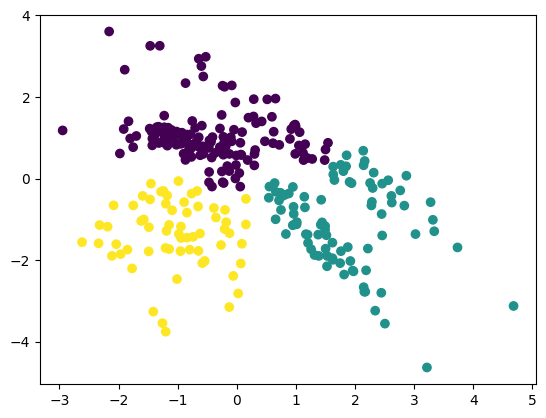

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data)
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

## Карты Кохонена


Крутой разбор: https://habr.com/ru/articles/338868/



In [ ]:
# simpSOM
# https://pypi.org/project/sklearn-som/
!pip install sklearn_som 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn_som.som import SOM

In [ ]:
iris_som = SOM(m=2, n=1, dim=2)
iris_som.fit(data)

In [ ]:
predictions = iris_som.predict(data)

In [ ]:
predictions

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1])

# Задание

1. Сгенерировать 3 датасета (make_classification или make_blobs)
2. Провести визуализацию
3. Провести кластеризацию (все методы)
4. Для каждого метода подобрать оптимальные гипер-параметры.
5. Самостоятельно реализовать KMeans. Проверить его работу на датасетах.
6. Каждый метод оценивать 2 внешними и 2 внутренними метриками.

# Доп. задание:

Реализовать DB-Scan

$%внизу лишний пробел$
! [](https://wojakparadise.net/wojak/3038/img)

## Генерация датасетов

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [2]:
data_1, data_y_1 = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=42)

In [3]:
data_2, data_y_2 = make_classification(n_samples=350, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, random_state=42)

In [4]:
data_3, data_y_3 = make_classification(n_samples=400, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=42)

## Визуализация данных

 ## 1.

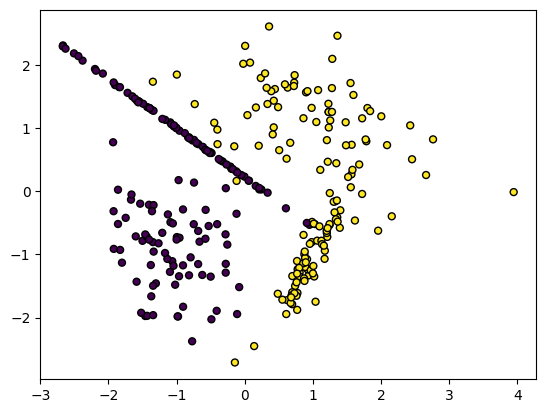

In [123]:
plt.scatter(data_1[:, 0], data_1[:, 1], marker="o", c=data_y_1, s=25, edgecolor="k")
plt.show()

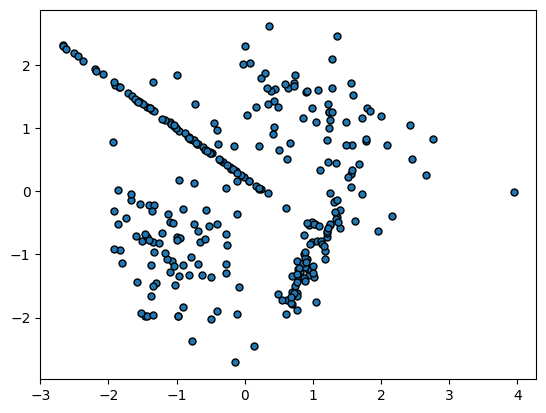

In [7]:
plt.scatter(data_1[:, 0], data_1[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

## 2.

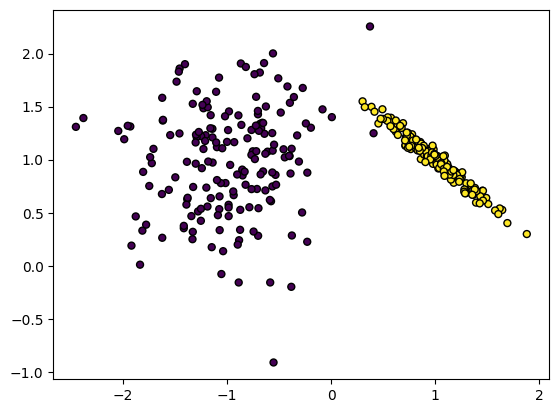

In [126]:
plt.scatter(data_2[:, 0], data_2[:, 1], marker="o", c=data_y_2, s=25, edgecolor="k")
plt.show()

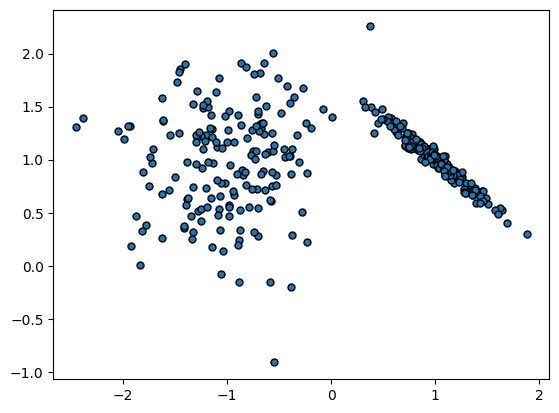

In [9]:
plt.scatter(data_2[:, 0], data_2[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

## 3.

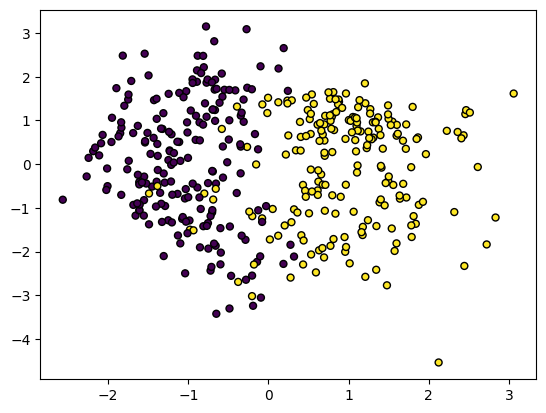

In [127]:
plt.scatter(data_3[:, 0], data_3[:, 1], marker="o", c=data_y_3, s=25, edgecolor="k")
plt.show()

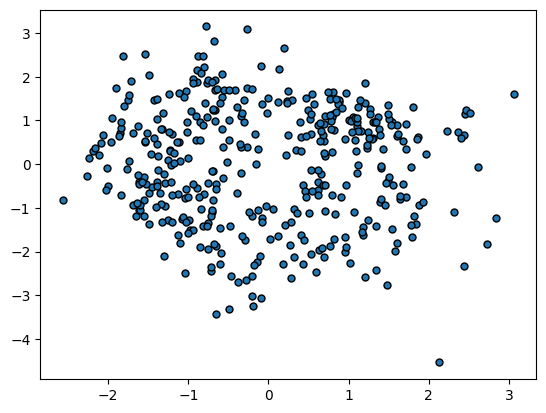

In [11]:
plt.scatter(data_3[:, 0], data_3[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

## KMeans

## 1.

In [12]:
from sklearn.cluster import KMeans

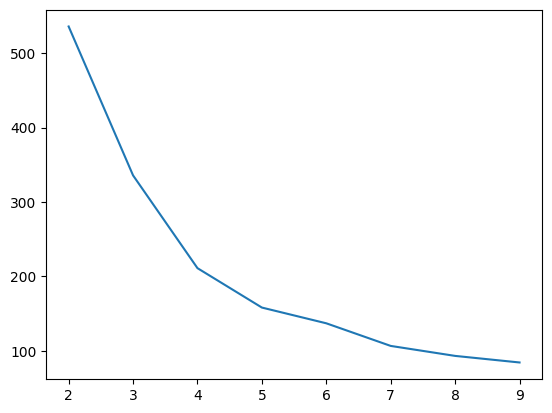

In [128]:
inertias = []

for k in range(2, 10):
    
    k_m = KMeans(k, n_init='auto').fit(data_1)
    inertias.append(k_m.inertia_)

plt.plot(range(2,10), inertias)

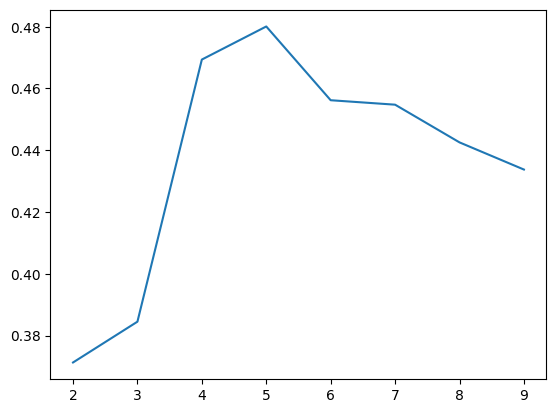

In [129]:
from sklearn.metrics import silhouette_score

ss = []

for i in range(2, 10):
    
    ss.append(silhouette_score(data_1, KMeans(i, n_init='auto').fit(data_1).labels_))

plt.plot(range(2,10), ss)

In [219]:
kmeans = KMeans(4, n_init='auto').fit(data_1)

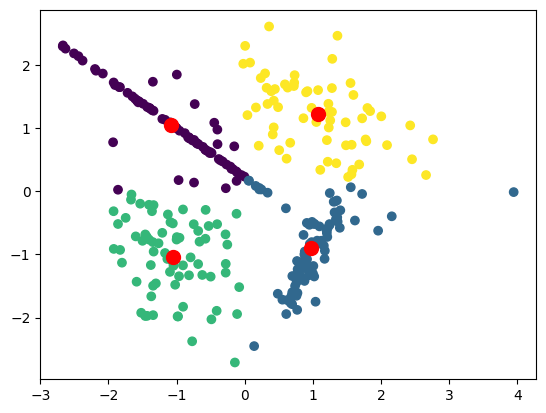

In [220]:
plt.scatter(data_1[:,0], data_1[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

### Оценка качества

#### внешние меры

In [ ]:
from sklearn.metrics.cluster import rand_score

In [132]:
rand_score(kmeans.labels_, data_y_1)  ##чем больше, тем лучше

0.6790858416945373

In [22]:
from sklearn.metrics import jaccard_score

In [222]:
jaccard_score(kmeans.labels_, data_y_1, average="micro") ##чем больше, тем лучше

0.32158590308370044

#### внутренние меры

In [23]:
from sklearn.metrics import silhouette_score

In [134]:
silhouette_score(data_1, kmeans.labels_) ##чем больше, тем лучше

0.47891502549933546

In [24]:
from sklearn.metrics import davies_bouldin_score

In [135]:
davies_bouldin_score(data_1,  kmeans.labels_)  ##чем меньше, тем лучше

0.7005147391841885

## 2.

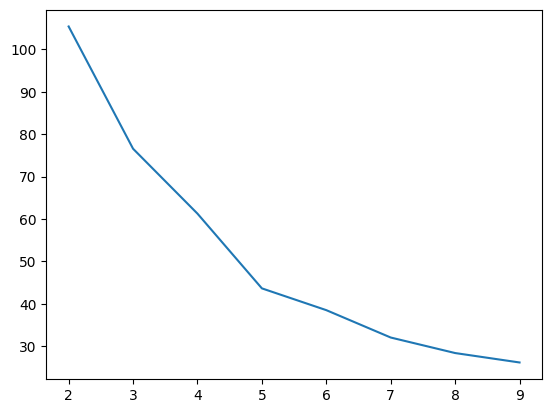

In [136]:
inertias = []

for k in range(2, 10):
    
    k_m = KMeans(k, n_init='auto').fit(data_2)
    inertias.append(k_m.inertia_)

plt.plot(range(2,10), inertias)

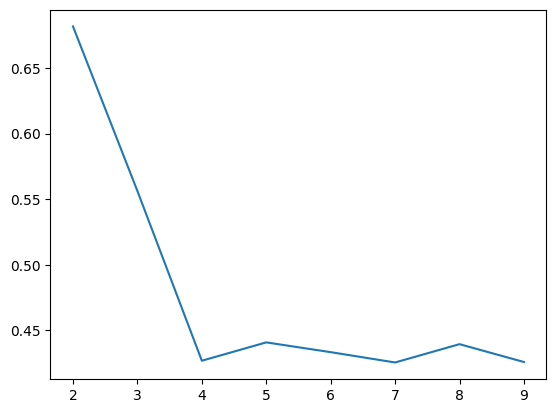

In [137]:
ss = []

for i in range(2, 10):
    
    ss.append(silhouette_score(data_2, KMeans(i, n_init='auto').fit(data_2).labels_))

plt.plot(range(2,10), ss)

In [138]:
kmeans = KMeans(4, n_init='auto').fit(data_2)

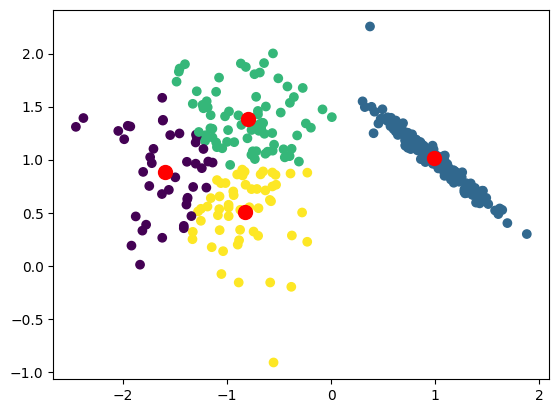

In [139]:
plt.scatter(data_2[:,0], data_2[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

### Оценка качества

#### внешние меры

In [140]:
rand_score(kmeans.labels_, data_y_2)

0.8300777732296357

In [141]:
jaccard_score(kmeans.labels_, data_y_2, average="micro")

0.4492753623188406

#### внутренние меры

In [142]:
silhouette_score(data_2, kmeans.labels_)

0.5471842726339443

In [143]:
davies_bouldin_score(data_2,  kmeans.labels_)

0.8102971652544425

## 3.

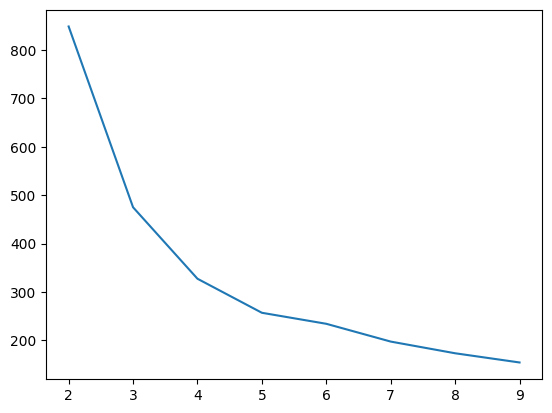

In [144]:
inertias = []

for k in range(2, 10):
    
    k_m = KMeans(k, n_init='auto').fit(data_3)
    inertias.append(k_m.inertia_)

plt.plot(range(2,10), inertias)

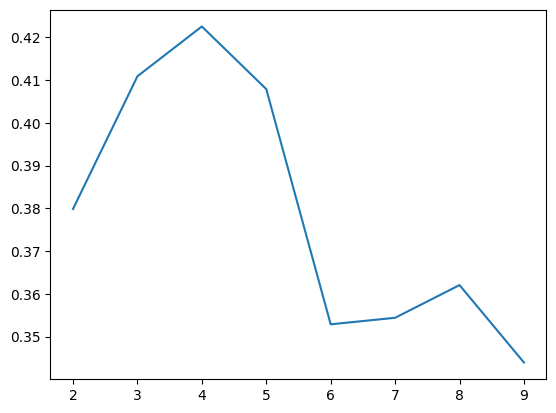

In [145]:
ss = []

for i in range(2, 10):
    
    ss.append(silhouette_score(data_3, KMeans(i, n_init='auto').fit(data_3).labels_))

plt.plot(range(2,10), ss)

In [146]:
kmeans = KMeans(3, n_init='auto').fit(data_3)

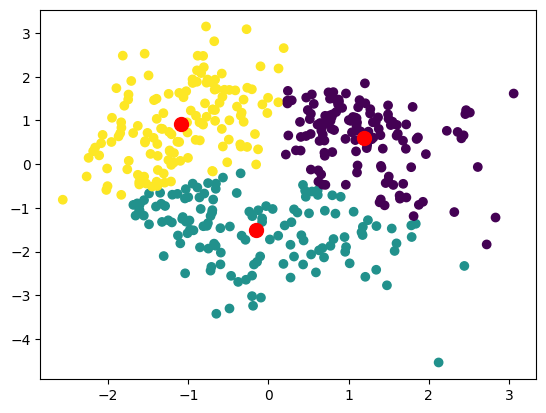

In [147]:
plt.scatter(data_3[:,0], data_3[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

### Оценка качества

#### внешние меры

In [148]:
rand_score(kmeans.labels_, data_y_3)

0.6892731829573935

In [149]:
jaccard_score(kmeans.labels_, data_y_3, average="micro")

0.08548168249660787

####  внутренние меры

In [150]:
silhouette_score(data_3, kmeans.labels_)

0.41086251715171174

In [151]:
davies_bouldin_score(data_3,  kmeans.labels_)

0.7935077260954922

## AffinityPropagation

## 1.

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
import numpy as np

In [157]:
from sklearn.cluster import AffinityPropagation

In [172]:
params = {
'preference': np.linspace(-30, 10, 20),
'damping': np.linspace(0.5, 1, 6),
}

In [173]:
gs = GridSearchCV(AffinityPropagation(), params, cv=3, scoring='rand_score')

In [174]:
gs.fit(data_1)

D:\Machine_Learning\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
D:\Machine_Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Machine_Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\Machine_Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Machine_Learning\venv\lib\site-packages\s

GridSearchCV(cv=3, estimator=AffinityPropagation(),
             param_grid={'damping': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'preference': array([-30.        , -27.89473684, -25.78947368, -23.68421053,
       -21.57894737, -19.47368421, -17.36842105, -15.26315789,
       -13.15789474, -11.05263158,  -8.94736842,  -6.84210526,
        -4.73684211,  -2.63157895,  -0.52631579,   1.57894737,
         3.68421053,   5.78947368,   7.89473684,  10.        ])},
             scoring='rand_score')

In [175]:
gs.best_params_

{'damping': 0.5, 'preference': -30.0}

D:\Machine_Learning\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


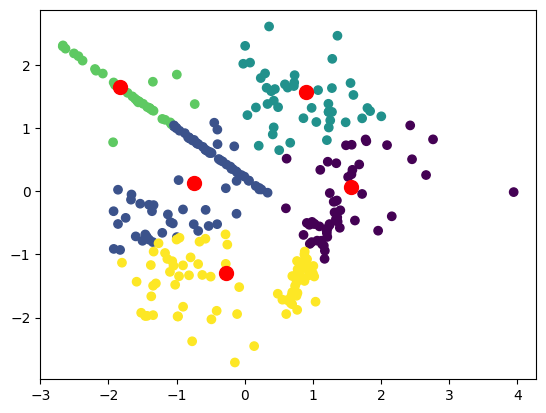

In [176]:
clustering = AffinityPropagation(preference=-30, damping=0.5).fit(data_1)

plt.scatter(data_1[:,0], data_1[:,1], c=clustering.labels_)
plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s=100, c='red')

### Оценка качества

#### внешние меры

In [177]:
rand_score(clustering.labels_, data_y_1)

0.6106577480490524

In [178]:
jaccard_score(clustering.labels_, data_y_1, average="micro")

0.015228426395939087

#### внутренние меры

In [179]:
silhouette_score(data_1, clustering.labels_)

0.3576734013329766

In [180]:
davies_bouldin_score(data_1,  clustering.labels_)

0.8699844561399477

## 2.

In [204]:
gs = GridSearchCV(AffinityPropagation(), params, cv=3, scoring='rand_score')

In [205]:
gs.fit(data_2)

D:\Machine_Learning\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
D:\Machine_Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Machine_Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\Machine_Learning\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
D:\Machine_Learning\venv\lib\site-packages\sklearn\model_selection\

GridSearchCV(cv=3, estimator=AffinityPropagation(),
             param_grid={'damping': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'preference': array([-30.        , -27.89473684, -25.78947368, -23.68421053,
       -21.57894737, -19.47368421, -17.36842105, -15.26315789,
       -13.15789474, -11.05263158,  -8.94736842,  -6.84210526,
        -4.73684211,  -2.63157895,  -0.52631579,   1.57894737,
         3.68421053,   5.78947368,   7.89473684,  10.        ])},
             scoring='rand_score')

In [206]:
gs.best_params_

{'damping': 0.5, 'preference': -30.0}

D:\Machine_Learning\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


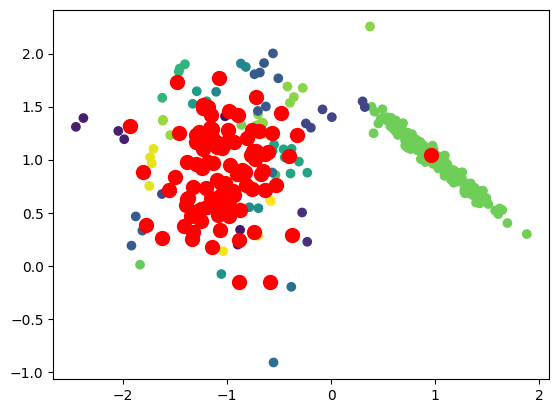

In [199]:
clustering = AffinityPropagation(preference=-30, damping=0.5).fit(data_2)

plt.scatter(data_2[:,0], data_2[:,1], c=clustering.labels_)
plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s=100, c='red')

### Оценка качества

#### внешние меры

In [200]:
rand_score(clustering.labels_, data_y_2)

0.7453131395824806

In [201]:
jaccard_score(clustering.labels_, data_y_2, average="micro")

0.001430615164520744

#### внутренние меры

In [202]:
silhouette_score(data_2, clustering.labels_)

0.3745207760276063

In [203]:
davies_bouldin_score(data_2, clustering.labels_)

0.4542069971630746

## 3.

In [207]:
gs = GridSearchCV(AffinityPropagation(), params, cv=3, scoring='rand_score')

In [208]:
gs.fit(data_3)

D:\Machine_Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Machine_Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\Machine_Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Machine_Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\Machine_Learning\venv\lib\site-pack

GridSearchCV(cv=3, estimator=AffinityPropagation(),
             param_grid={'damping': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'preference': array([-30.        , -27.89473684, -25.78947368, -23.68421053,
       -21.57894737, -19.47368421, -17.36842105, -15.26315789,
       -13.15789474, -11.05263158,  -8.94736842,  -6.84210526,
        -4.73684211,  -2.63157895,  -0.52631579,   1.57894737,
         3.68421053,   5.78947368,   7.89473684,  10.        ])},
             scoring='rand_score')

In [209]:
gs.best_params_

{'damping': 0.5, 'preference': -30.0}

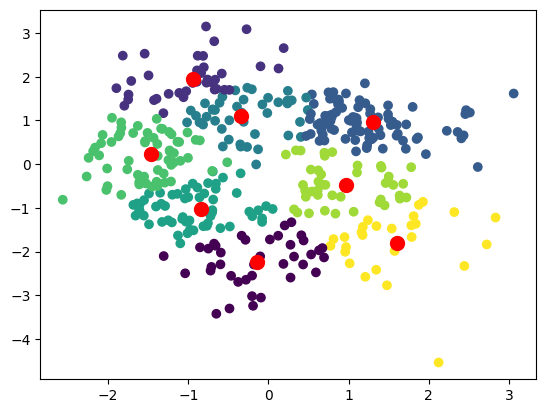

In [214]:
clustering = AffinityPropagation(preference=-30, damping=0.5).fit(data_3)

plt.scatter(data_3[:,0], data_3[:,1], c=clustering.labels_)
plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s=100, c='red')

### Оценка качества

#### внешние меры

In [215]:
rand_score(clustering.labels_, data_y_3)

0.6040225563909775

In [216]:
jaccard_score(clustering.labels_, data_y_3, average="micro")

0.030927835051546393

#### внутренние меры

In [217]:
silhouette_score(data_3, clustering.labels_)

0.3493081884480274

In [218]:
davies_bouldin_score(data_3, clustering.labels_)

0.9015591898061479

## DBSCAN

## 1.

In [225]:
from sklearn.cluster import DBSCAN

In [226]:
params = {"eps": np.linspace(0.1, 0.5, 5), "min_samples": range(3, 10)}

In [230]:
gs = GridSearchCV(DBSCAN(), params, cv=3, scoring='rand_score')

In [231]:
gs.fit(data_1)

D:\Machine_Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Machine_Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\Machine_Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Machine_Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\Machine_Learning\venv\lib\site-pack

GridSearchCV(cv=3, estimator=DBSCAN(),
             param_grid={'eps': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'min_samples': range(3, 10)},
             scoring='rand_score')

In [232]:
gs.best_params_

{'eps': 0.1, 'min_samples': 3}

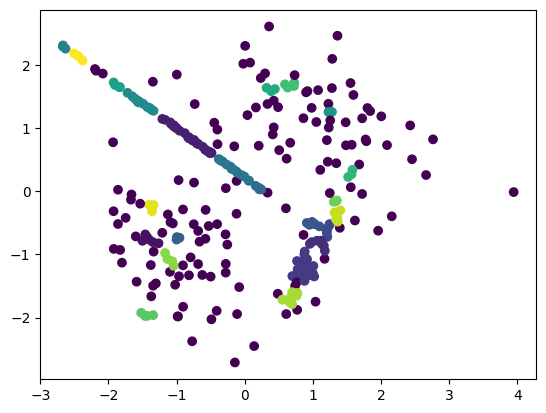

In [234]:
dbscan = DBSCAN(eps=0.1, min_samples=3).fit(data_1)
plt.scatter(data_1[:,0], data_1[:,1], c=dbscan.labels_)

### Оценка качества

#### внешние меры

In [235]:
rand_score(dbscan.labels_, data_y_1)

0.524726867335563

In [236]:
jaccard_score(dbscan.labels_, data_y_1, average="micro")

0.010101010101010102

#### внутренние меры

In [237]:
silhouette_score(data_1, dbscan.labels_)

-0.04063657947671067

In [238]:
davies_bouldin_score(data_1, dbscan.labels_)

2.512133103562447

## 2.

In [239]:
gs = GridSearchCV(DBSCAN(), params, cv=3, scoring='rand_score')

In [240]:
gs.fit(data_2)

D:\Machine_Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Machine_Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\Machine_Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Machine_Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\Machine_Learning\venv\lib\site-pack

GridSearchCV(cv=3, estimator=DBSCAN(),
             param_grid={'eps': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'min_samples': range(3, 10)},
             scoring='rand_score')

In [241]:
gs.best_params_

{'eps': 0.1, 'min_samples': 3}

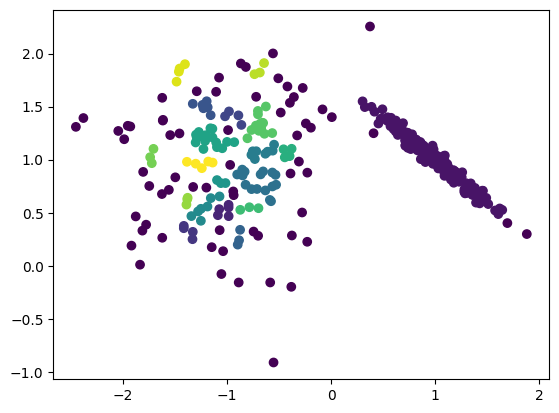

In [242]:
dbscan = DBSCAN(eps=0.1, min_samples=3).fit(data_2)
plt.scatter(data_2[:,0], data_2[:,1], c=dbscan.labels_)

### Оценка качества

#### внешние меры

In [243]:
rand_score(dbscan.labels_, data_y_2)

0.7832992222677037

In [244]:
jaccard_score(dbscan.labels_, data_y_2, average="micro")

0.0

#### внутренние меры

In [245]:
silhouette_score(data_2, dbscan.labels_)

0.3539232268228175

In [246]:
davies_bouldin_score(data_2, dbscan.labels_)

2.340239684651654

## 3.

In [247]:
gs = GridSearchCV(DBSCAN(), params, cv=3, scoring='rand_score')

In [248]:
gs.fit(data_3)

D:\Machine_Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Machine_Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\Machine_Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Machine_Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\Machine_Learning\venv\lib\site-pack

GridSearchCV(cv=3, estimator=DBSCAN(),
             param_grid={'eps': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'min_samples': range(3, 10)},
             scoring='rand_score')

In [249]:
gs.best_params_

{'eps': 0.1, 'min_samples': 3}

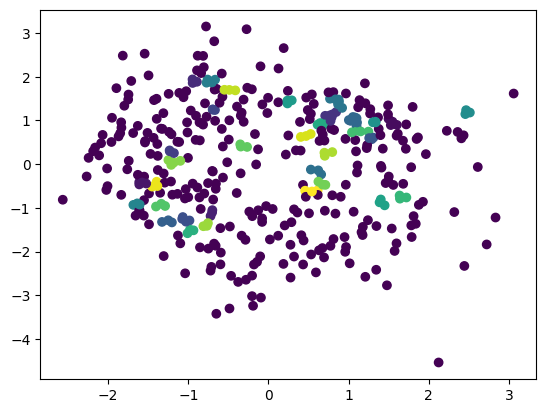

In [251]:
dbscan = DBSCAN(eps=0.1, min_samples=3).fit(data_3)
plt.scatter(data_3[:,0], data_3[:,1], c=dbscan.labels_)

### Оценка качества

#### внешние меры

In [252]:
rand_score(dbscan.labels_, data_y_3)

0.5035714285714286

In [253]:
jaccard_score(dbscan.labels_, data_y_3, average="micro")

0.0

#### внутренние меры

In [254]:
silhouette_score(data_3, dbscan.labels_)

-0.35474252582154564

In [255]:
davies_bouldin_score(data_3, dbscan.labels_)

1.416655429371433

## GaussianMixture, EM

## 1.

In [256]:
from sklearn.mixture import GaussianMixture

In [257]:
parameters = {"n_components" : range(2, 10)}

In [258]:
gs = GridSearchCV(GaussianMixture(), parameters, cv=3)

In [259]:
gs.fit(data_1)

GridSearchCV(cv=3, estimator=GaussianMixture(),
             param_grid={'n_components': range(2, 10)})

In [260]:
gs.best_params_

{'n_components': 4}

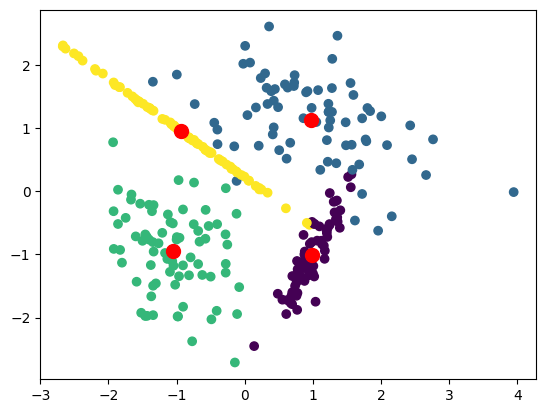

In [261]:
gm = GaussianMixture(n_components=4).fit(data_1)

plt.scatter(data_1[:,0], data_1[:,1], c=gm.predict(data_1))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

### Оценка качества

#### внешние меры

In [263]:
rand_score(gm.predict(data_1), data_y_1)

0.7425418060200669

In [264]:
jaccard_score(gm.predict(data_1), data_y_1, average="micro")

0.14285714285714285

#### внутренние меры

In [265]:
silhouette_score(data_1, gm.predict(data_1))

0.4150940757713531

In [266]:
davies_bouldin_score(data_1, gm.predict(data_1))

0.861147514750613

## 2.

In [271]:
gs = GridSearchCV(GaussianMixture(), parameters, cv=3)

In [272]:
gs.fit(data_2)

GridSearchCV(cv=3, estimator=GaussianMixture(),
             param_grid={'n_components': range(2, 10)})

In [269]:
gs.best_params_

{'n_components': 2}

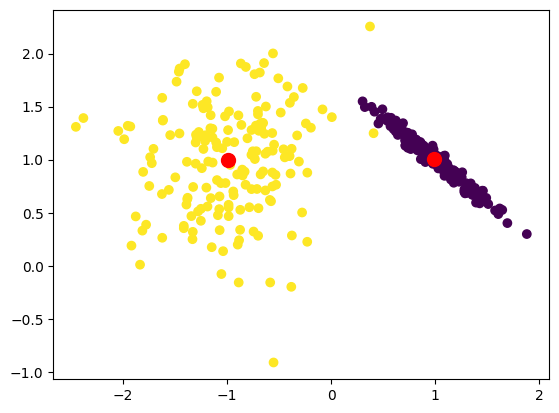

In [273]:
gm = GaussianMixture(n_components=2).fit(data_2)

plt.scatter(data_2[:,0], data_2[:,1], c=gm.predict(data_2))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

### Оценка качества

#### внешние меры

In [274]:
rand_score(gm.predict(data_2), data_y_2)

1.0

In [275]:
jaccard_score(gm.predict(data_2), data_y_2, average="micro")

0.0

#### внутренние меры

In [276]:
silhouette_score(data_2, gm.predict(data_2))

0.676015590822192

In [277]:
davies_bouldin_score(data_2, gm.predict(data_2))

0.45819054125059844

## 3.

In [278]:
gs = GridSearchCV(GaussianMixture(), parameters, cv = 3)

In [279]:
gs.fit(data_3)

GridSearchCV(cv=3, estimator=GaussianMixture(),
             param_grid={'n_components': range(2, 10)})

In [280]:
gs.best_params_

{'n_components': 4}

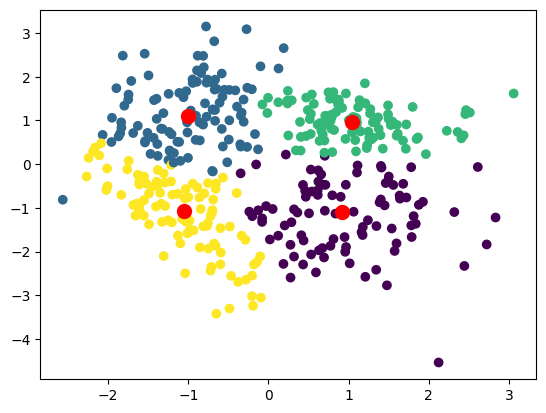

In [281]:
gm = GaussianMixture(n_components=4).fit(data_3)

plt.scatter(data_3[:,0], data_3[:,1], c=gm.predict(data_3))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

### Оценка качества

#### внешние меры

In [282]:
rand_score(gm.predict(data_3), data_y_3)

0.7020175438596491

In [283]:
jaccard_score(gm.predict(data_3), data_y_3, average="micro")

0.012658227848101266

#### внутренние меры

In [284]:
silhouette_score(data_3, gm.predict(data_3))

0.39673193374327664

In [285]:
davies_bouldin_score(data_3, gm.predict(data_3))

0.8176805794303735

## Иерархическая кластеризация

## 1.

In [286]:
from scipy.cluster import hierarchy

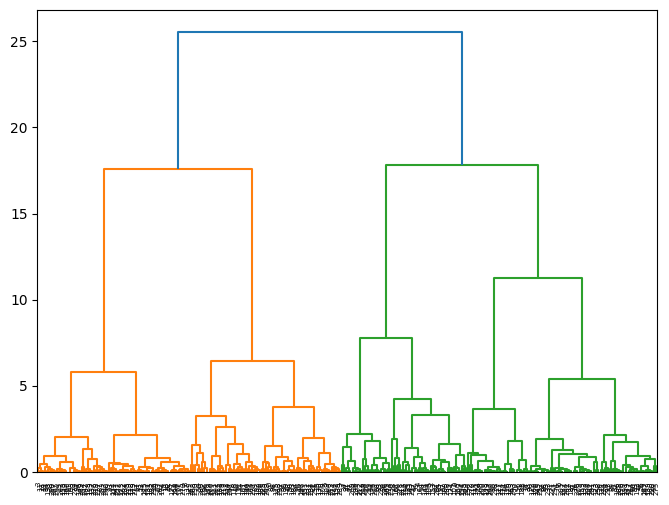

In [287]:
clusters = hierarchy.linkage(data_1, method="ward")
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

In [288]:
from sklearn.cluster import AgglomerativeClustering

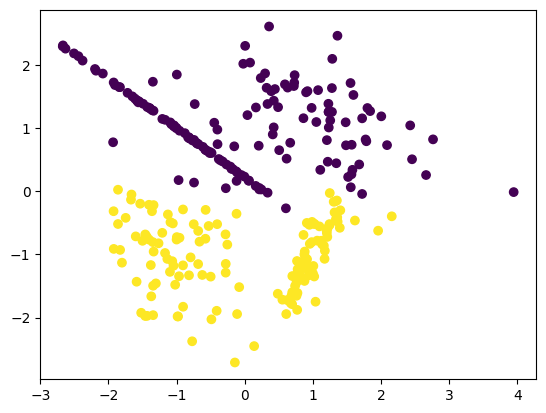

In [289]:
clustering = AgglomerativeClustering(n_clusters=2, linkage="ward").fit(data_1)
plt.scatter(data_1[:,0], data_1[:,1], c=clustering.labels_)

### Оценка качества

#### внешние меры

In [290]:
rand_score(clustering.labels_, data_y_1)

0.4983500557413601

In [291]:
jaccard_score(clustering.labels_, data_y_1, average="micro")

0.3363028953229399

#### внутренние меры

In [292]:
silhouette_score(data_1, clustering.labels_)

0.36912593414818073

In [293]:
davies_bouldin_score(data_1, clustering.labels_)

1.176844646436843

## 2.

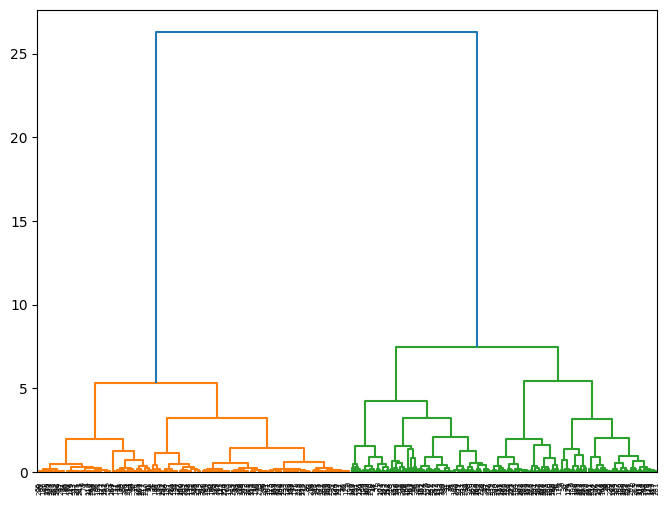

In [294]:
clusters = hierarchy.linkage(data_2, method="ward")
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

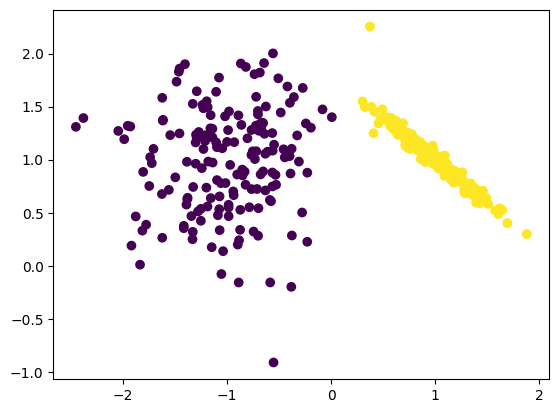

In [295]:
clustering = AgglomerativeClustering(n_clusters=2, linkage="ward").fit(data_2)
plt.scatter(data_2[:,0], data_2[:,1], c=clustering.labels_)

### Оценка качества

#### внешние меры

In [296]:
rand_score(clustering.labels_, data_y_2)

0.9886041751944331

In [297]:
jaccard_score(clustering.labels_, data_y_2, average="micro")

0.9886363636363636

#### внутренние меры

In [298]:
silhouette_score(data_2, clustering.labels_)

0.6816430432688491

In [299]:
davies_bouldin_score(data_2, clustering.labels_)

0.45441472873690514

## 3.

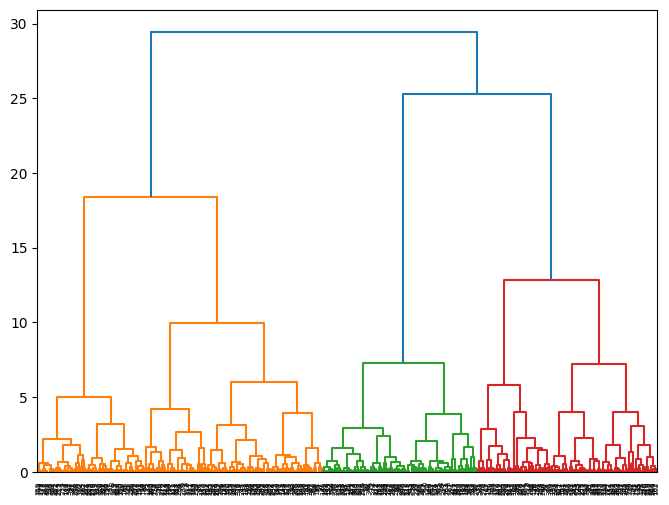

In [300]:
clusters = hierarchy.linkage(data_3, method="ward")
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

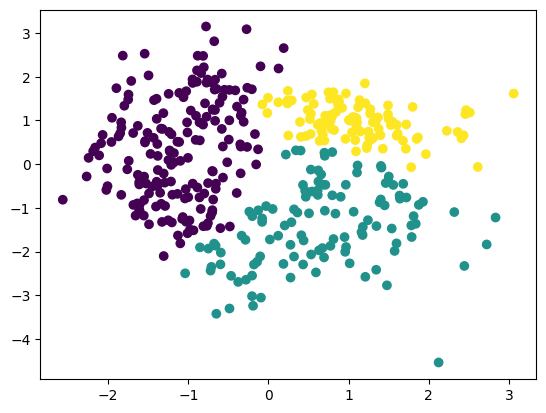

In [301]:
clustering = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data_3)
plt.scatter(data_3[:,0], data_3[:,1], c=clustering.labels_)

### Оценка качества

#### внешние меры

In [302]:
rand_score(clustering.labels_, data_y_3)

0.7490225563909775

In [303]:
jaccard_score(clustering.labels_, data_y_3, average="micro")

0.4897579143389199

#### внутренние меры

In [304]:
silhouette_score(data_3, clustering.labels_)

0.37175647066839757

In [305]:
davies_bouldin_score(data_3, clustering.labels_)

0.8667019347453717

## Карты Кохонена

## 1.

In [11]:
from sklearn_som.som import SOM

In [42]:
som = SOM(m=2, n=1, dim=2)
som.fit(data_1)

In [43]:
predictions = som.predict(data_1)

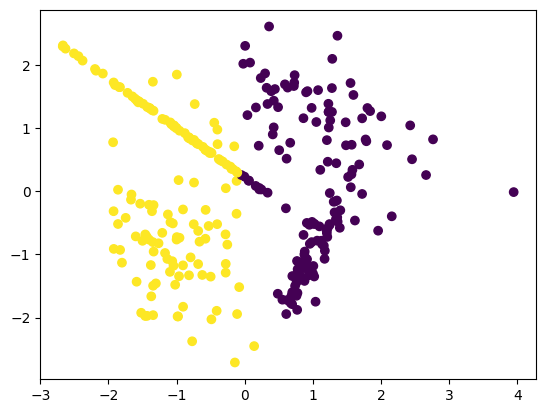

In [55]:
plt.scatter(data_1[:,0], data_1[:,1], c=predictions)

### Оценки качества

#### внешние меры

In [48]:
rand_score(predictions, data_y_1)

0.857948717948718

In [50]:
jaccard_score(predictions, data_y_1, average="micro")

0.03986135181975736

#### внутренние меры

In [51]:
silhouette_score(data_1, predictions)

0.36969270833204293

In [54]:
davies_bouldin_score(data_1, predictions)

1.1762530373848843

## 2.

In [56]:
som = SOM(m=2, n=1, dim=2)
som.fit(data_2)

In [57]:
predictions = som.predict(data_2)

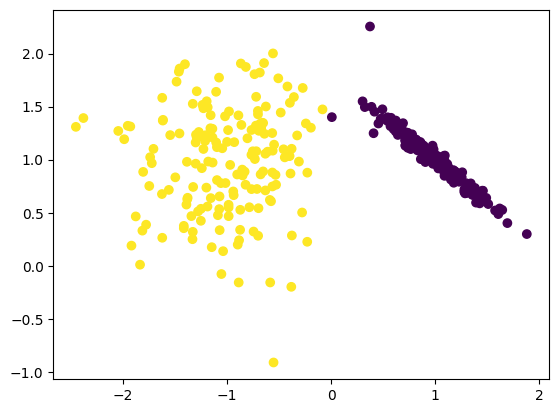

In [59]:
plt.scatter(data_2[:,0], data_2[:,1], c=predictions)

### Оценка качества

#### внешние меры

In [60]:
rand_score(predictions, data_y_2)

0.9829553827261563

In [61]:
jaccard_score(predictions, data_y_2, average="micro")

0.00430416068866571

#### внутренние меры

In [62]:
silhouette_score(data_2, predictions)

0.681628645089559

In [63]:
davies_bouldin_score(data_2, predictions)

0.45515785319540986

## 3.

In [64]:
som = SOM(m=2, n=1, dim=2)
som.fit(data_3)

In [65]:
predictions = som.predict(data_3)

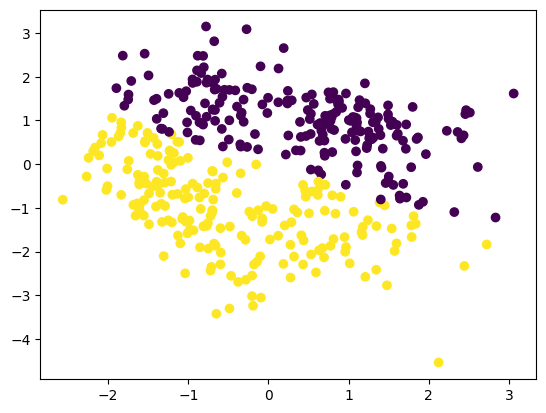

In [66]:
plt.scatter(data_3[:,0], data_3[:,1], c=predictions)

### Оценка качества

#### внешние меры

In [67]:
rand_score(predictions, data_y_3)

0.5380451127819549

In [68]:
jaccard_score(predictions, data_y_3, average="micro")

0.21951219512195122

#### внутренние меры

In [69]:
silhouette_score(data_3, predictions)

0.368822547818079

In [70]:
davies_bouldin_score(data_3, predictions)

1.1345509783286776

## Реализация KMeans

In [83]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(sample_1, sample_2):
    return np.sqrt(np.sum((sample_1-sample_2)**2))

class KMeans:

    def __init__(self, K=3, max_iters=100):
        
        self.K = K
        self.max_iters = max_iters
        self.clusters = [[] for i in range(self.K)]   # список индексов объектов каждого кластера
        self.centroids = []   #центры кластеров

    def predict(self, X):
        
        self.X = X
        centroids_idxs = np.random.choice(self.X.shape[0], self.K, replace=False) #выбор K различных центров кластеров
        self.centroids = [self.X[i] for i in centroids_idxs]

        for iter in range(self.max_iters):
            
            self.clusters = self.create_clusters(self.centroids)  #назначение объекта к ближайшему центроиду
            centroids_old = self.centroids
            self.centroids = self.new_centroids(self.clusters)  #вычисление новых центроидов
            
            distances = [euclidean_distance(centroids_old[i], self.centroids[i]) for i in range(self.K)]
            if sum(distances) == 0:
                break

        return self.get_predictions(self.clusters)   # получение меток
 
    def get_predictions(self, clusters):
        
        # назначение кластеров объектам
        
        predictions = np.empty(self.X.shape[0])
        for cluster_idx, cluster in enumerate(clusters):
            for idx in cluster:
                predictions[idx] = cluster_idx

        return predictions

    def create_clusters(self, centroids):

        clusters = [[] for i in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self.closest_centroid(sample, centroids)  ## расчет расстояния от объекта до центроидов, выбор min
            clusters[centroid_idx].append(idx)
        return clusters

    def closest_centroid(self, sample, centroids):
        
        #определение расстояние от объекта до каждого центроида
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    def new_centroids(self, clusters):
        
        # расчет среднего значения
        centroids = np.zeros((self.K, self.X.shape[1]))
        for cluster_idx, cluster in enumerate(clusters):
            mean_value_cluster = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = mean_value_cluster
        return centroids

## 1.

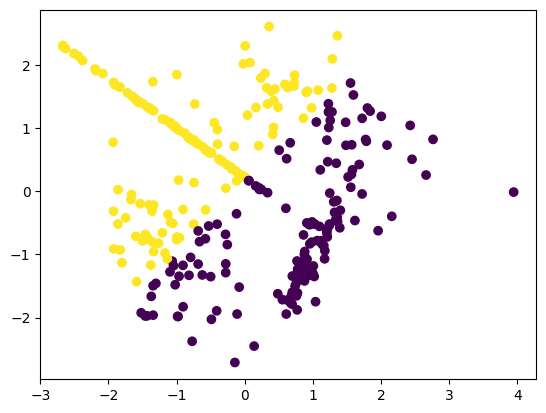

In [84]:
k = KMeans(K=2, max_iters=100)
y_pred = k.predict(data_1)
plt.scatter(data_1[:,0], data_1[:,1], c=y_pred)

### Оценка качества

#### внешние меры

In [85]:
rand_score(y_pred, data_y_1)

0.592530657748049

In [86]:
jaccard_score(y_pred, data_y_1, average="micro")

0.1650485436893204

#### внутренние меры

In [87]:
silhouette_score(data_1, y_pred)

0.3459176604606848

In [88]:
davies_bouldin_score(data_1, y_pred)

1.155610793960487

## 2.

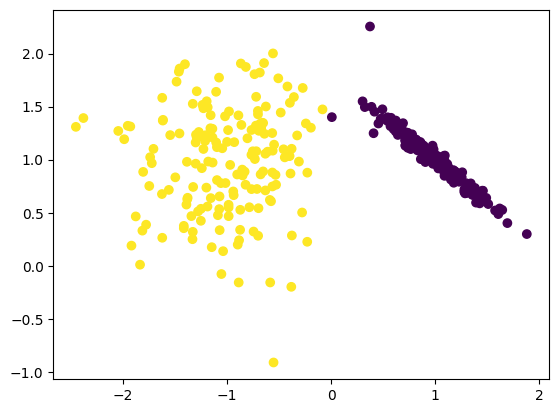

In [39]:
k = KMeans(K=2, max_iters=100)
y_pred = k.predict(data_2)
plt.scatter(data_2[:,0], data_2[:,1], c=y_pred)

### Оценка качества

#### внешние меры

In [40]:
rand_score(y_pred, data_y_2)

0.9829553827261563

In [41]:
jaccard_score(y_pred, data_y_2, average="micro")

0.00430416068866571

#### внутренние меры

In [42]:
silhouette_score(data_2, y_pred)

0.681628645089559

In [43]:
davies_bouldin_score(data_2, y_pred)

0.45515785319540986

## 3.

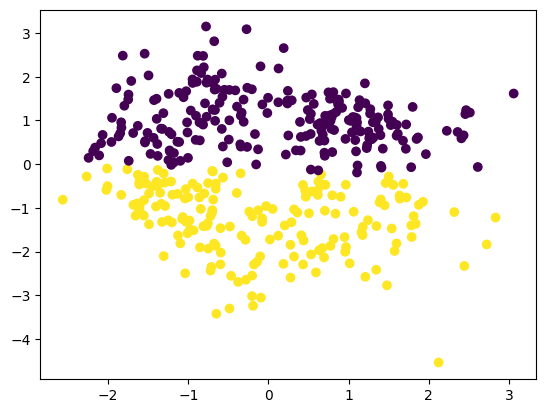

In [44]:
k = KMeans(K=2, max_iters=100)
y_pred = k.predict(data_3)
plt.scatter(data_3[:,0], data_3[:,1], c=y_pred)

## Оценка качества

#### внешние меры

In [45]:
rand_score(y_pred, data_y_3)

0.49954887218045113

In [46]:
jaccard_score(y_pred, data_y_3, average="micro")

0.3157894736842105

#### внутренние меры

In [47]:
silhouette_score(data_3, y_pred)

0.3798508720198279

In [48]:
davies_bouldin_score(data_3, y_pred)

1.103477574640686